In [1]:
%matplotlib inline

Dataset is already in place. If you want to fetch it again please first remove the folder /home/arybinski/.dipy/stanford_hardi 
Dataset is already in place. If you want to fetch it again please first remove the folder /home/arybinski/.dipy/stanford_hardi 
Dataset is already in place. If you want to fetch it again please first remove the folder /home/arybinski/.dipy/stanford_hardi 


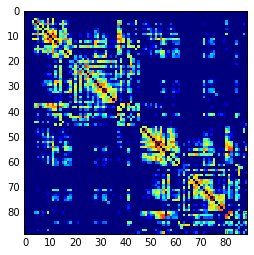

In [2]:
from dipy.tracking import utils

import numpy as np

from nibabel import trackvis
from dipy.data import read_stanford_labels

hardi_img, gtab, labels_img = read_stanford_labels()
labels = labels_img.get_data()

affine = np.array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

streams, hdr = trackvis.read('/home/arybinski/data/experimental_detr.trk')
streamlines = [s[0] for s in streams]



M, grouping = utils.connectivity_matrix(streamlines, labels, affine=affine,
                                        return_mapping=True,
                                        mapping_as_streamlines=True)
M[:3, :] = 0
M[:, :3] = 0


# Matrix including only 86 gray matter labels

labelsConnectivity = M[3:, 3:]

#make self-label connection equal 0
for i in range(86):
    labelsConnectivity[i][i] = 0

 
# Visualize matrix

import matplotlib.pyplot as plt


plt.imshow(np.log1p(M), interpolation='nearest')
plt.show()
#plt.savefig("allconnectivity.png")
#np.savetxt('allconnectivityMatrix.txt', labelsConnectivity)


In [3]:
np.shape(streamlines)

(1322522,)

In [4]:
import dipy.viz.fvtk as fvtk
import numpy as np

label_coords = np.loadtxt('labels_coords_86.txt')
labelsConnectivity = np.loadtxt('allconnectivityMatrix.txt')

lines_color = [205/255.0,247/255.0,255/255.0]
points_color = [2/255.0, 128/255.0, 232/255.0]

lines = []
for columnNumber in range(86):
    for rowNumber in range(86):
        if labelsConnectivity[columnNumber][rowNumber] > 20 :
            lines.append([label_coords[columnNumber],label_coords[rowNumber]])


ren = fvtk.ren()
pointActors = fvtk.point(label_coords, points_color, opacity=1.0, point_radius=3)
lineActors = fvtk.line(lines, lines_color, opacity=0.2, linewidth=2)


fvtk.add(ren, pointActors)
fvtk.add(ren, lineActors)


In [7]:
# to explore the data in 3D interactive way
fvtk.show(ren)

# save figure

#fvtk.camera(ren, [-1, -1, 0], [0, 0, 0], viewup=[0, 0, 1])
#fvtk.record(ren, n_frames=1, 
#            out_path='brain_network_example.png',
#            size=(600, 600))

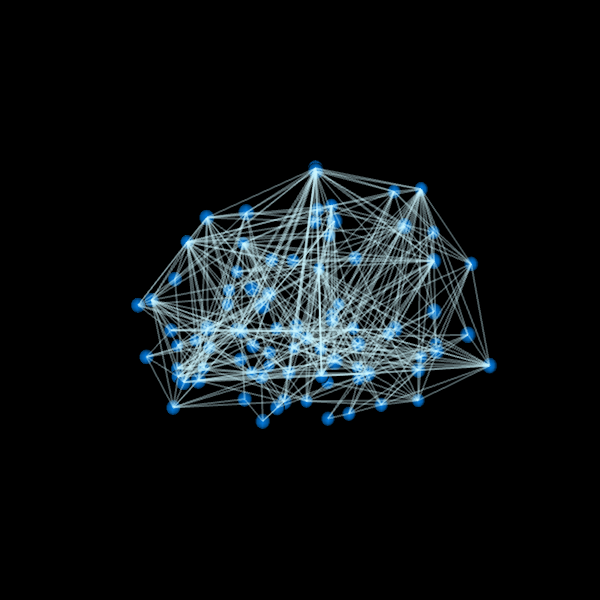

In [5]:
from IPython.display import Image
Image(filename='brain_network_example.png') 